# CIFAR-10 DATASET Image Classification Using CNN

## Introduction

In this notebook we will be using a Convolutional Neural Network(CNN) to classify images from the CIFAR-10 Dataset. The CIFAR-10 Dataset consists of 60,000 coloured images of the objects airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Each image is 32x32 pixels.

Our goal is to train a CNN that can accurately classify these images into their respective digit classes.

## Importing Libraries

In [196]:
import numpy as np
import matplotlib.pyplot as plt

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Import models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

## Loading and Preprocessing the Data

### Loading the CIFAR-10 Dataset

We'll load the CIFAR-10 dataset directly from Keras.

In [197]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Exploring the Data

Exploring the shape of the data to understand it better

In [198]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (50000, 32, 32, 3) (50000, 1)
Test data shape: (10000, 32, 32, 3) (10000, 1)


### Visualizing the Data

Let's visualize some of the training images.

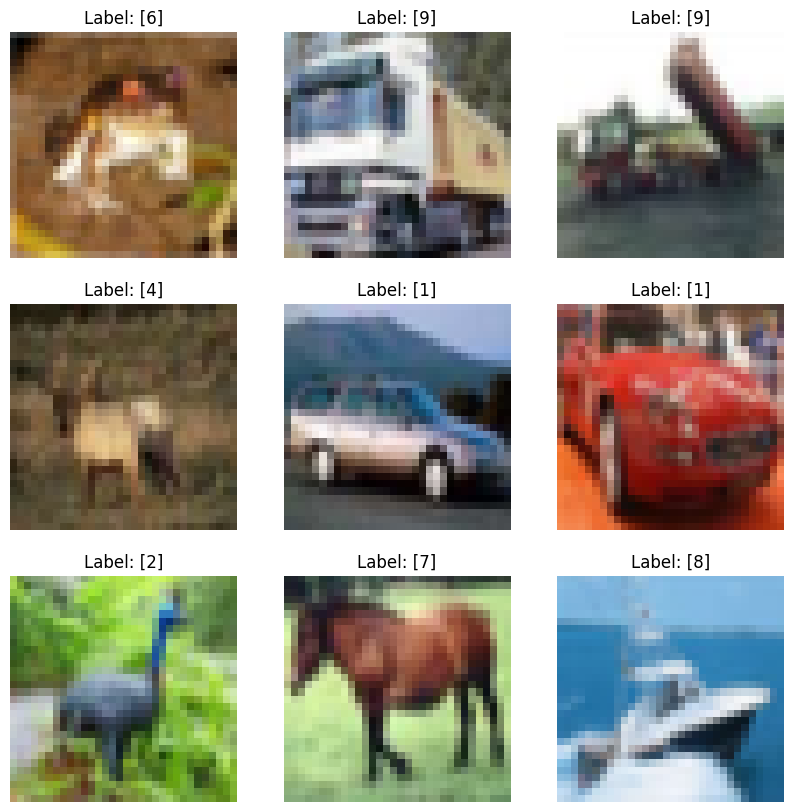

In [199]:
# Plot the first 9 images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

### Preprocessing the Data

#### Reshaping the Data

Our CNN expects the input shape to be `(samples, height, width, channels)`. Since the images are grayscale, we have 1 channel.

In [200]:
# Reshape the data to include channel dimension
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [201]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

#### Normalizing the Data

Normalize the pixel values to be between 0 and 1.

In [202]:
# Convert data type to float32

# Normalize

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [203]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

#### One-Hot Encoding the Labels

Convert the labels to one-hot encoded vectors.

In [204]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Building the CNN Model

We'll build a sequential model with the following architecture:

1. **Conv2D Layer**: 32 filters, kernel size 3x3, ReLU activation, with same padding
2. **Conv2D Layer**: 64 filters, kernel size 3x3, ReLU activation
3. **Conv2D Layer**: 128 filters, kernel size 3x3, ReLU activation
4. **Batch Normalization Layer**
5. **MaxPooling2D Layer**: pool size 2x2
6. **Dropout Layer**: 25% dropout
7. **Flatten Layer**
8. **Dense Layer**: 128 units, ReLU activation
9. **Dropout Layer**: 50% dropout
10. **Dense Layer**: 10 units, Softmax activation (output layer)

In [227]:
# Initialize the model
model = Sequential()

# Add first convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding="same"))

# Add second convolutional layer
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
# Add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Add a dense layer
model.add(Dense(128, activation='tanh'))

# Add another dropout layer
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(10, activation='softmax'))

### Model Summary

Let's view the model architecture.

In [228]:
# Print the model summary
model.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,442 (12.61 MB)

 Trainable params: 3,306,186 (12.61 MB)

 Non-trainable params: 256 (1.00 KB)

### Compiling the Model

We'll compile the model using the **Adam** optimizer and **categorical crossentropy** loss function.

In [229]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

We'll train the model with a batch size of 128 and for 10 epochs. We'll also use 10% of the training data as a validation set.

In [230]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 217s 610ms/step - accuracy: 0.4100 - loss: 1.7326 - val_accuracy: 0.3576 - val_loss: 1.8650
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 221s 626ms/step - accuracy: 0.6375 - loss: 1.0386 - val_accuracy: 0.6464 - val_loss: 1.0295
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 228s 647ms/step - accuracy: 0.6957 - loss: 0.8836 - val_accuracy: 0.6668 - val_loss: 0.9565
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 215s 610ms/step - accuracy: 0.7423 - loss: 0.7412 - val_accuracy: 0.6938 - val_loss: 0.8919
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 209s 594ms/step - accuracy: 0.7731 - loss: 0.6566 - val_accuracy: 0.6900 - val_loss: 0.9327
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 205s 583ms/step - accuracy: 0.7939 - loss: 0.5898 - val_accuracy: 0.7120 - val_loss: 0.8814
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 205s 581ms/step - accuracy: 0.8156 - loss: 0.5291 - val_accuracy: 0.7054 - val_loss: 0.8994
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 267s 595ms/step - accuracy: 0.8295 -

### Visualizing Training History

We can plot the training and validation accuracy and loss over epochs.

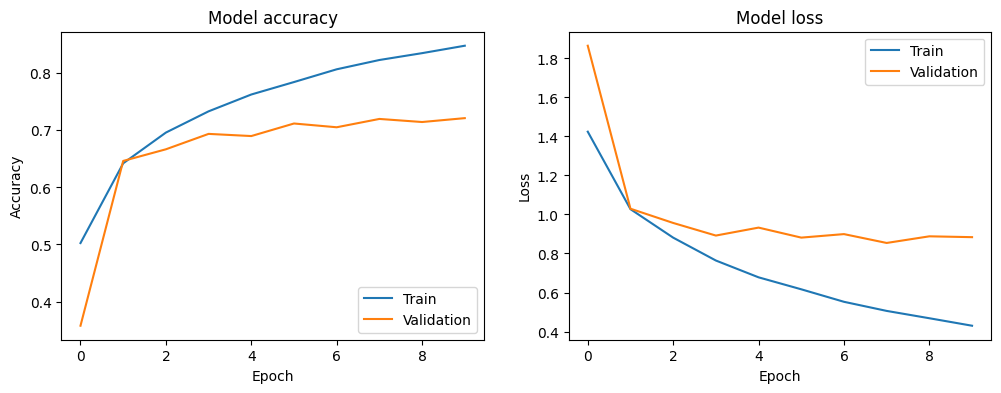

In [231]:
# Plot training & validation accuracy values
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

## Evaluating the Model

Now, we'll evaluate the model on the test set.

In [233]:
from sklearn.metrics import classification_report, f1_score, recall_score
import numpy as np

# Evaluate the model on test data to get loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Predict the classes for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded outputs to class indices
y_pred_classes = np.argmax(y_pred, axis=1) 

# Convert one-hot encoded test labels to class indices
y_true = np.argmax(y_test, axis=1) 

# Generate the classification report (which includes precision, recall, F1 score)
report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:\n", report)

# Optionally, you can calculate recall and F1 score separately:
f1 = f1_score(y_true, y_pred_classes, average='weighted')  # 'weighted' handles class imbalance
recall = recall_score(y_true, y_pred_classes, average='weighted')

print(f"\nWeighted F1 Score: {f1:.4f}")
print(f"Weighted Recall: {recall:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.7129 - loss: 0.9090
Test loss: 0.9142
Test accuracy: 0.7125
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.86      0.82      0.84      1000
           2       0.60      0.60      0.60      1000
           3       0.52      0.57      0.55      1000
           4       0.70      0.59      0.64      1000
           5       0.63      0.63      0.63      1000
           6       0.76      0.79      0.77      1000
           7       0.72      0.79      0.75      1000
           8       0.81      0.80      0.81      1000
           9       0.84      0.80      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000


Weighted F1 Score: 0.7131
Weighted Recall: 0.7125


## Making Predictions

Let's make some predictions on the test set.

In [234]:
# Predict classes for test set
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step


In [235]:
y_pred

array([[3.56321718e-04, 3.95305018e-04, 5.46721974e-03, ...,
        5.21483249e-04, 5.18511329e-03, 6.64386083e-04],
       [2.41555627e-02, 5.76768853e-02, 1.03914121e-04, ...,
        2.52728273e-06, 9.15618956e-01, 2.32452713e-03],
       [2.37534847e-02, 1.05695434e-01, 8.60005166e-05, ...,
        2.73719430e-04, 8.66890967e-01, 1.82786386e-03],
       ...,
       [1.05305835e-05, 5.10221071e-07, 8.22283030e-02, ...,
        7.99783692e-02, 5.42397902e-06, 4.08026208e-05],
       [1.01739496e-01, 1.15482852e-01, 8.92215222e-03, ...,
        1.94562431e-02, 9.68076813e-04, 5.43992734e-04],
       [2.13848216e-05, 1.06617872e-05, 1.77924725e-04, ...,
        9.95338321e-01, 4.75582738e-07, 3.27256703e-06]], dtype=float32)

In [236]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

## Conclusion

We have successfully built and trained a CNN to classify handwritten digits with high accuracy. This demonstrates the power of deep learning models in image classification tasks.

**Key Takeaways:**

- **Data Preprocessing**: Reshaping and normalizing the data is crucial.
- **Model Architecture**: A simple CNN with a couple of convolutional layers can achieve high accuracy.
- **Regularization**: Dropout layers help prevent overfitting.
- **Evaluation**: Always evaluate your model on unseen data to assess its performance.

By tweaking hyperparameters and the model architecture, you can further improve the model's performance.

In [237]:
from keras.callbacks import EarlyStopping

# Initialize the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

# Fit the model and pass the callback
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    callbacks=[early_stopping]
)



Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 254s 721ms/step - accuracy: 0.8575 - loss: 0.4043 - val_accuracy: 0.7178 - val_loss: 0.8908
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 252s 715ms/step - accuracy: 0.8673 - loss: 0.3758 - val_accuracy: 0.7168 - val_loss: 0.9185
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 264s 749ms/step - accuracy: 0.8678 - loss: 0.3736 - val_accuracy: 0.7234 - val_loss: 0.9122
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 255s 723ms/step - accuracy: 0.8722 - loss: 0.3546 - val_accuracy: 0.7216 - val_loss: 0.9276
